# DATA ANALYSIS FROM PYBER RIDE SHARING DATA

Eric Staveley  MWSa  

* There are considerably more urban riders than rural riders.  The average fare for the rural customers is significantly higher than the fares observed in the suburban and urban areas.  Both of these observations seem logical given longer distances required for driving to urban areas and that population density is greater in an urban area, thus more customers are available for ride sharing.

* The uban areas also have a considerably higher driver count (80% of all drivers) than the other two regions, where suburb and rural fares consisted of only 20% of the total rides.  Again, this is logical, given that the demand for rides would be higher in a more population-dense region.

* Once can conclude that while distance of the ride may appear to be a large contributing factor to fare amount from the bubble plot, it would be interesting to determine average fare distance and compare the scatter of the data for the three types.  Another interesting graph would be fare amount vs miles travelled by region type.

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

#length = len(city_df)

In [3]:
#take a quick look at the df's
#city_df.head(10)     #city, driver_count, type


In [4]:
#ride_df.head(10)      #city, date,fare,ride_id

In [5]:
# Combine the data into a single dataset
#combine on city...left join.   None of the other joins made a dff, actually  right, outter, inner
combined_city_ride_df = pd.merge(city_df, ride_df, how='left', on='city')

# Display the data table for preview
#combined_city_ride_df.head()   #review it
#combined_city_ride_df


In [6]:
#combined_city_ride_df["type"].unique()    #investigate all of our types
all_rides_count = len(combined_city_ride_df)
#all_rides_count


## Bubble Plot of Ride Sharing Data

In [7]:
#create an Urban DF   look for occurrences of Urban in type to make an urban df
selection  = combined_city_ride_df["type"]=="Urban"
urban_df = combined_city_ride_df.loc[selection, :]
#urban_df.head()

In [8]:
##START HERE..1st of 3 DF's for this plot

#create an Urban DF   look for occurrences of Urban in type to make an urban df
selection  = combined_city_ride_df["type"]=="Urban"
urban_df = combined_city_ride_df.loc[selection, :]
urban_df.head()

#compute avg fare per city  Y  (series)
avg_fare_by_city_urban = urban_df.groupby("city")["fare"].mean()
#avg_fare_by_city_urban.head(10)

#compute total count for rides in a city  X   (series)  
city_ride_tot_count_urban = urban_df.groupby("city")["city"].count()
#city_ride_tot_count.head(10)

#compute driver count per city (circle size)   (series)
driver_count_per_city_urban = urban_df.groupby("city")["driver_count"].max()     
#driver_count_per_city.head(10)

# Build the scatter plots for each city types..
#plt.scatter(city_ride_tot_count_urban, avg_fare_by_city_urban, marker = "o", s=driver_count_per_city_urban, facecolors="coral", alpha=0.75, label = "Urban")



In [9]:
#create an Suburban DF   look for occurrences of Suburban in type to make an suburban df
selection  = combined_city_ride_df["type"]=="Suburban"
suburban_df = combined_city_ride_df.loc[selection, :]
#suburban_df.head()

#compute avg fare per city Y  (series)
avg_fare_by_city_sub = suburban_df.groupby("city")["fare"].mean()
#avg_fare_by_city.head(10)

#compute total count for rides in a city  X   (series)  
city_ride_tot_count_sub = suburban_df.groupby("city")["city"].count()
#city_ride_tot_count.head(10)

#compute driver count per city (circle size)   (series)
driver_count_per_city_sub = suburban_df.groupby("city")["driver_count"].max()     
#driver_count_per_city.head(10)

# Build the scatter plots for each city types..
#plt.scatter(city_ride_tot_count_sub, avg_fare_by_city_sub, marker = "o", s=driver_count_per_city_sub, facecolors="blue", alpha=0.35, label = "Suburban")






In [10]:
#create an Rural DF   look for occurrences of Rural in type to make an rural df
selection  = combined_city_ride_df["type"]=="Rural"
rural_df = combined_city_ride_df.loc[selection, :]
#rural_df.head()

#compute avg fare per city   Y   (series)
avg_fare_by_city_rural = rural_df.groupby("city")["fare"].mean()
#avg_fare_by_city.head(10)

#compute total count for rides in a city   X     (series)  
city_ride_tot_count_rural = rural_df.groupby("city")["city"].count()
#city_ride_tot_count.head(10)

#compute driver count per city (circle size)   (series)
driver_count_per_city_rural = rural_df.groupby("city")["driver_count"].max()     
#driver_count_per_city.head(10)

# Build the scatter plots for each city types..
#plt.scatter(city_ride_tot_count_rural, avg_fare_by_city_rural, marker = "o", s=driver_count_per_city_rural, facecolors="brown", alpha=0.95, label = "Rural")



Figure saved at: Figures/RideSharingDataDistribution.png


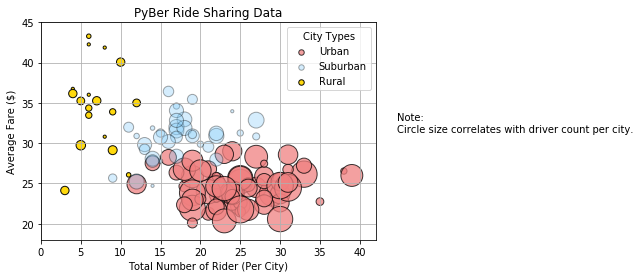

In [11]:

#define a bubble plot size scalar to make sizes differentiable
bubble_size_scalar = 10

# Build the scatter plots for each city types
plt.scatter(city_ride_tot_count_urban, avg_fare_by_city_urban, marker = "o", s=driver_count_per_city_urban*bubble_size_scalar, facecolors='#F08080', edgecolor = "black", alpha=0.75, label = "Urban")
plt.scatter(city_ride_tot_count_sub, avg_fare_by_city_sub, marker = "o", s=driver_count_per_city_sub*bubble_size_scalar, facecolors='#87CEFA', edgecolor = "black", alpha=0.35, label = "Suburban")
plt.scatter(city_ride_tot_count_rural, avg_fare_by_city_rural, marker = "o", s=driver_count_per_city_rural*bubble_size_scalar, facecolors='#FFD700', edgecolor = "black", alpha=0.95, label = "Rural")

# Create a legend
#plt.legend(loc="best")

# Incorporate the other graph properties
plt.ylim(18,45)
plt.xlim(0,42)
plt.grid()

# Create a title, x label, and y label for our chart
plt.title("PyBer Ride Sharing Data")
plt.xlabel("Total Number of Rider (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
#it appears you have to "hack" the marker size, since it will make the average shape from the data, so...
#instead of:    plt.legend(loc="best", title="City Types")
lgnd = plt.legend(loc="best", numpoints=1, fontsize=10, title = "City Types")
#change the marker size manually for each type
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
#plt.legend()      #not here, now
                                                          
# Incorporate a text label regarding circle size
textstr = "Note:\nCircle size correlates with driver count per city."
#plt.annotate(textstr, xy=(1,1))
plt.gcf().text(0.95, 0.5, textstr, fontsize=10)

#Show plot    show AFTER the saving....or you can get a blank image in the file
#plt.show()

# Save Figure
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
print("Figure saved at: Figures/RideSharingDataDistribution.png")
plt.savefig("Figures/RideSharingDataDistribution.png", bbox_inches='tight')    # tight keeps the text from getting cropped

#Show plot    show AFTER the saving....or you can get a blank image in the file
plt.show()                    






In [12]:
def buildshow_piechart(lookat):
    
    if lookat == "fare":
        total_lookat_amount = combined_city_ride_df[lookat].sum()
        urban_sum_amount = urban_df[lookat].sum()
        suburban_sum_amount = suburban_df[lookat].sum()
        rural_sum_amount = rural_df[lookat].sum()
        
    elif lookat == "ride":
        total_lookat_amount = len(combined_city_ride_df)
        urban_sum_amount = len(urban_df)
        suburban_sum_amount= len(suburban_df)
        rural_sum_amount  = len(rural_df)
        
    elif lookat == "driver":
        total_lookat_amount = city_df["driver_count"].sum()
        #make a driver count df by city type
        driver_sum_df = city_df.groupby(["type"])[["driver_count"]].sum()
        #calc type driver counts
        urban_sum_amount = driver_sum_df.loc["Urban", "driver_count"] 
        suburban_sum_amount = driver_sum_df.loc["Suburban", "driver_count"] 
        rural_sum_amount = driver_sum_df.loc["Rural", "driver_count"] 
   
    #total_lookat_amount = combined_city_ride_df[lookat].sum()
    #total_fares_amount

    # Calculate Percents per type
    urban_pct = urban_sum_amount / total_lookat_amount
    suburban_pct = suburban_sum_amount / total_lookat_amount
    rural_pct = rural_sum_amount / total_lookat_amount

    #print(f"urbanpct: +  {urban_pct} + suburbanpct: + {suburban_pct} + ruralpct: + {rural_pct}")

    #define a working attribute df of type, percentage, explodefactor, color code.  useful later for plt items)
    attribute_df = pd.DataFrame(
        {"Type": ["Urban", "Suburban", "Rural"],
         "Percent": [urban_pct, suburban_pct, rural_pct],
         "ColorCode": ['#F08080', '#87CEFA', '#FFD700']
        }
    )
    attribute_df.head()

    attribute_sorted_df = attribute_df.sort_values(["Percent"], ascending = False)

    #largest_pct_reindex_df = largest_pct_df.reset_index(inplace=True)

    #add a series to this sorted df that will be our explode order for pie chart
    attribute_sorted_df["Explode Value"] = [0.1, 0, 0]

    attribute_sorted_df.head()    #finished packing with our data
    #largest_pct_reindex_df = largest_pct_df.reset_index(inplace=True)

    #add a series to this sorted df that will be our explode order for pie chart
    attribute_sorted_df["Explode Value"] = [0.1, 0, 0]

    attribute_sorted_df.head()    #finished packing with our data...show it


    # Build Pie Chart

    #labels for the sections of the pie chart (get info from our attribute df)
    #labels = ["Urban", "Suburban", "Rural"]
    labels = [attribute_sorted_df.iloc[0,0], attribute_sorted_df.iloc[1,0],attribute_sorted_df.iloc[2,0]]

    #values for each section of the pie chart
    #sizes = [urban_pct, suburban_pct, rural_pct]
    sizes = [attribute_sorted_df.iloc[0,1], attribute_sorted_df.iloc[1,1],attribute_sorted_df.iloc[2,1]]

    #colors for each section of the pie chart
    #colors = ["#F08080", "#87CEFA", "#FFD700"]
    colors = [attribute_sorted_df.iloc[0,2], attribute_sorted_df.iloc[1,2],attribute_sorted_df.iloc[2,2]]

    #explode the largest slice
    type1_explode_val = attribute_sorted_df.iloc[0,3]
    type2_explode_val = attribute_sorted_df.iloc[1,3]
    type3_explode_val = attribute_sorted_df.iloc[2,3]
    explode = (type1_explode_val,type2_explode_val,type3_explode_val)

    # Creates the pie chart based upon the values above
    # Automatically finds the percentages of each part of the pie chart
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=240)


    # Tells matplotlib that we want a pie chart with equal axes
    plt.axis("equal")

    # Create a title,  for our chart
    #capitalize the type
    caplookat = lookat.capitalize()
    titlestr = "% Of Total " + caplookat + "s By City Type"
    plt.title(titlestr)
 
    # Save Figure
    filestr = "Figures/" + caplookat + "sByCityTypePieChart.png"
    print("Figure saved at: " + filestr)
    plt.savefig(filestr, bbox_inches='tight')  #tight keeps any wide text in imagefile
    
    # Show Figure   show AFTER the saving....or you can get a blank image in the file
    plt.show()

    

## Total Fares by City Type

Figure saved at: Figures/FaresByCityTypePieChart.png


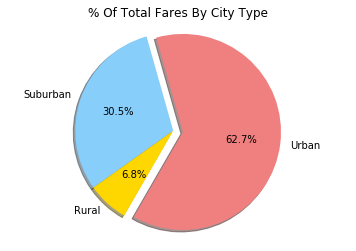

In [13]:
#call function to compute fares by city type
buildshow_piechart("fare")

## Total Rides by City Type

Figure saved at: Figures/RidesByCityTypePieChart.png


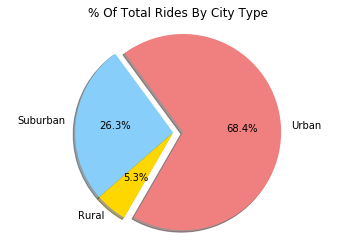

In [14]:
#call function to compute rides by city type
buildshow_piechart("ride")

## Total Drivers by City Type

Figure saved at: Figures/DriversByCityTypePieChart.png


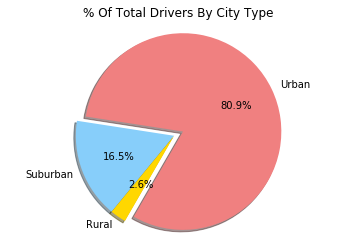

In [15]:
#call function to compute drivers by city type
buildshow_piechart("driver")